In [2]:
import theano
import theano.tensor as T
import numpy as np

## From scan's documentation

The general order of function parameters to `fn` is:

`sequences (if any), prior result(s) (if needed), non-sequences (if any)`



## Range 

In [3]:
i = T.iscalar('i')

def step(i):
  return i + 1

o, u = theano.scan(fn=step, n_steps=i, outputs_info=T.zeros(()))

theano_range = theano.function(inputs=[i], outputs=o, updates=u)

In [5]:
theano_range(15)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.])

## Fibonacci

This can be also done using `taps` parameter, but this one is simpler.

In [6]:
N = T.iscalar('N')

def fib_step(n, n_prev, n_prev_prev):
  return n_prev + n_prev_prev, n_prev

o, u = theano.scan(fn=fib_step,
                  n_steps=N,
                  sequences=T.arange(N),
                  outputs_info=[1.,1.])

theano_fib = theano.function(inputs=[N], outputs=o[1])

In [7]:
theano_fib(10)

array([  1.,   2.,   3.,   5.,   8.,  13.,  21.,  34.,  55.,  89.], dtype=float32)

## Smoothing filter

In [12]:
x = T.vector('x')
y = T.scalar('y')
alpha = T.scalar('alpha')

def filter_step(x_next, y_prev, alpha):
  return alpha * x_next + (1 - alpha) * y_prev

o, u = theano.scan(fn=filter_step,
                   sequences=[x],
                   outputs_info=[np.float64(0)],
                   non_sequences=[alpha])

theano_smoother = theano.function(inputs=[x, alpha], outputs=o)

In [13]:
noise = np.random.randn(50) / 25 
rng = np.linspace(-np.pi, np.pi)
x = np.sin(rng) + noise


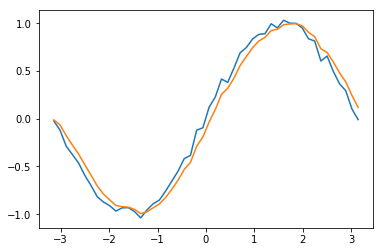

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rng, x)
plt.plot(rng, theano_smoother(x, 0.5))
plt.show()